In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Importing dataset

In [2]:
df = pd.read_csv(r'C:\Users\sidde\OneDrive\Documents\Dissertation\Final\Data_source\Insurance data.csv')


df.head()

,claim_number,age_of_driver,gender,marital_status,safty_rating,annual_income,high_education_ind,address_change_ind,living_status,zip_code,...,liab_prct,channel,policy_report_filed_ind,claim_est_payout,age_of_vehicle,vehicle_category,vehicle_price,vehicle_color,vehicle_weight,fraud
0,1,46,M,1.0,85,38301,1,1,Rent,80006,...,74,Broker,0,7530.940993,9.0,Compact,12885.45235,white,16161.33381,0
1,3,21,F,0.0,75,30445,0,1,Rent,15021,...,79,Online,0,2966.024895,4.0,Large,29429.45218,white,28691.96422,0
2,4,49,F,0.0,87,38923,0,1,Own,20158,...,0,Broker,0,6283.888333,3.0,Compact,21701.18195,white,22090.94758,1
3,5,58,F,1.0,58,40605,1,0,Own,15024,...,99,Broker,1,6169.747994,4.0,Medium,13198.27344,other,38329.58106,1
4,6,38,M,1.0,95,36380,1,0,Rent,50034,...,7,Broker,0,4541.387150,7.0,Medium,38060.21122,gray,25876.56319,0


### EDA


#### 1. Handling missing values



In [3]:
df.isna().sum()

claim_number                 0
age_of_driver                0
gender                       0
marital_status               5
safty_rating                 0
annual_income                0
high_education_ind           0
address_change_ind           0
living_status                0
zip_code                     0
claim_date                   0
claim_day_of_week            0
accident_site                0
past_num_of_claims           0
witness_present_ind        132
liab_prct                    0
channel                      0
policy_report_filed_ind      0
claim_est_payout            17
age_of_vehicle               8
vehicle_category             0
vehicle_price                0
vehicle_color                0
vehicle_weight               0
fraud                        0
dtype: int64

In [4]:
# Replace NaN values with 0's for marital_status,witness_present_ind as it has binary values
df['marital_status'].fillna(0, inplace=True)
df['witness_present_ind'].fillna(0, inplace=True)

# Replace NaN values with mean values for claim_est_payout,age_of_vehicle as it has continuous values
df['claim_est_payout'].fillna(df['claim_est_payout'].median(), inplace=True)
df['age_of_vehicle'].fillna(df['age_of_vehicle'].median(), inplace=True)



#### Cleaning independent continuous variables

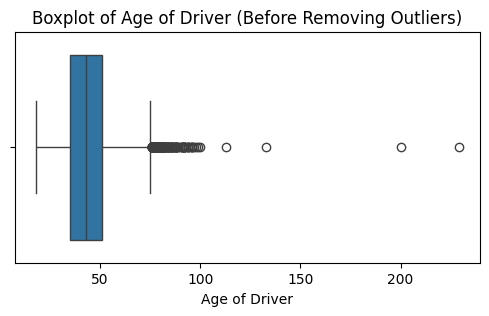

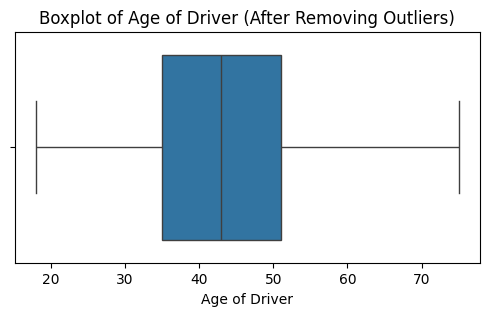

In [5]:
plt.figure(figsize=(6, 3))
sns.boxplot(x='age_of_driver', data=df)
plt.title('Boxplot of Age of Driver (Before Removing Outliers)')
plt.xlabel('Age of Driver')
plt.show()



median_age = df['age_of_driver'].median()
#Calculate the IQR for 'age_of_driver'
Q1 = df['age_of_driver'].quantile(0.25)
Q3 = df['age_of_driver'].quantile(0.75)
IQR = Q3 - Q1
# Define the upper and lower bounds to identify outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
# Identify and replace outliers in 'age_of_driver' with the median age
df['age_of_driver'] = np.where((df['age_of_driver'] < lower_bound) | (df['age_of_driver'] > upper_bound),
                                median_age, df['age_of_driver'])

# Verify the removal of outliers by creating a boxplot
plt.figure(figsize=(6,3))
sns.boxplot(x='age_of_driver', data=df)
plt.title('Boxplot of Age of Driver (After Removing Outliers)')
plt.xlabel('Age of Driver')
plt.show()




In [6]:
#Handling outliers in Annual Income
median_income = df['annual_income'].median()
# Replace ages greater than 100 with the median age
df['annual_income'] = np.where(df['annual_income'] < 0, median_income, df['annual_income'])

#### 2. Cleaning target variable

In [7]:
# Checking the target variable
df["fraud"].value_counts()


fraud
 0    15179
 1     2816
-1        3
Name: count, dtype: int64

In [8]:
# Target variable fraud has -1,0,1 values where it can have only 0's and 1's. So dropping the outliers
df = df[df["fraud"] != -1]

#### 3. Handling temporal values


In [9]:
# Convert the 'Date' column to a datetime object
df['claim_date'] = pd.to_datetime(df['claim_date'])
# Extract the year and create a new 'Year' column
df['Claim_Year'] = df['claim_date'].dt.year

#### 4.Visualizing the target variable

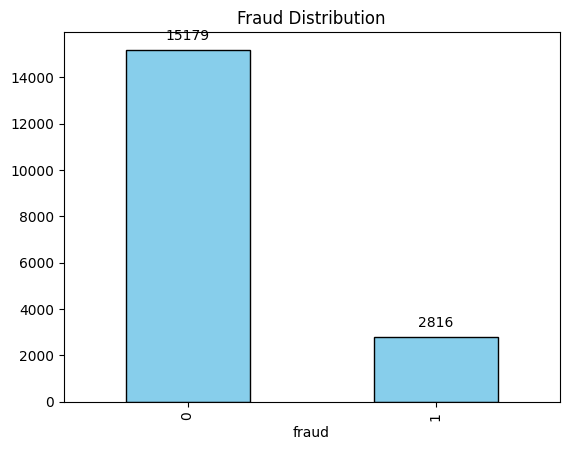

In [10]:
ax = df['fraud'].value_counts().plot.bar(color='skyblue', edgecolor='black')
# Adding data labels to the bars
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
# Display the plot
plt.title('Fraud Distribution')  
plt.show()

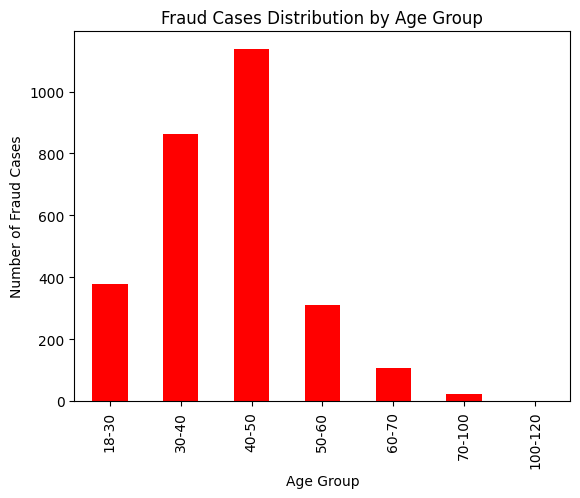

In [11]:
age_bins = [18, 30, 40, 50, 60, 70, 100, 120]  # Define your age bins
df['age_group'] = pd.cut(df['age_of_driver'], bins=age_bins, right=True, labels=[f'{age_bins[i-1]}-{age_bins[i]}' for i in range(1, len(age_bins))])

# Count the number of fraud cases in each age group
fraud_counts = df.groupby('age_group')['fraud'].sum()

# Bar chart
fraud_counts.plot(kind='bar', color='red')
plt.title('Fraud Cases Distribution by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Fraud Cases')

# Display the plot
plt.show()

# Drop the 'age_group' column if you no longer need it
df.drop('age_group', axis=1, inplace=True)

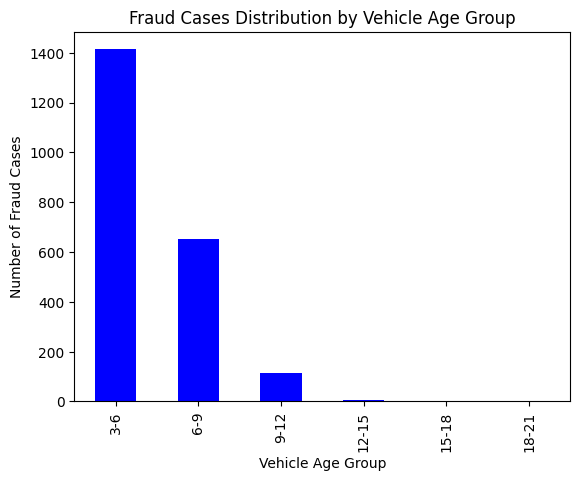

In [12]:
age_bins = [3,6,9,12,15,18,21]  # Define your age bins
df['Vechicle_age_group'] = pd.cut(df['age_of_vehicle'], bins=age_bins, right=True, labels=[f'{age_bins[i-1]}-{age_bins[i]}' for i in range(1, len(age_bins))])

# Count the number of fraud cases in each age group
fraud_counts = df.groupby('Vechicle_age_group')['fraud'].sum()

# Bar chart
fraud_counts.plot(kind='bar', color='blue')
plt.title('Fraud Cases Distribution by Vehicle Age Group')
plt.xlabel('Vehicle Age Group')
plt.ylabel('Number of Fraud Cases')

# Display the plot
plt.show()

# Drop the 'age_group' column if you no longer need it
df.drop('Vechicle_age_group', axis=1, inplace=True)

#### 5. Visualizing insured's discrete/continuous data

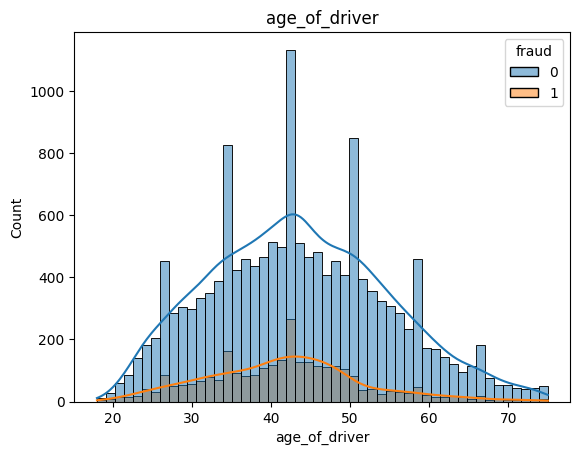

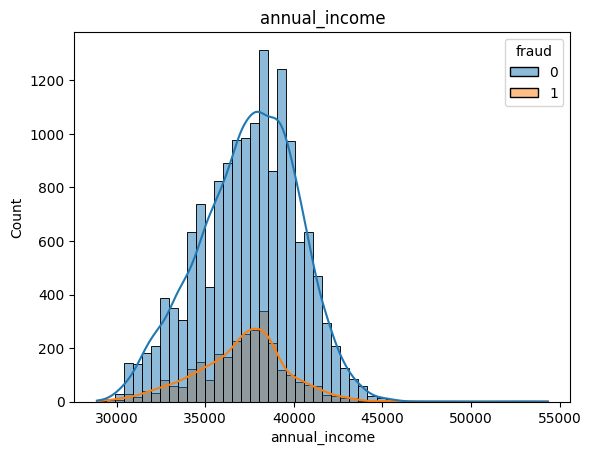

In [13]:
# Create a histogram or density plot
for col in ["age_of_driver", "annual_income"]:
    sns.histplot(data=df, x=col, hue='fraud', bins=50, kde=True)
    plt.title(f'{col}')
    plt.show()

#### 6. Visualizing insured's categorical data

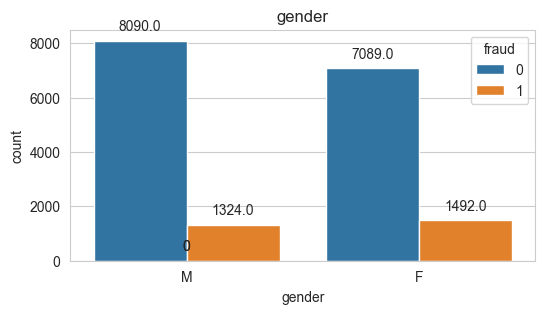

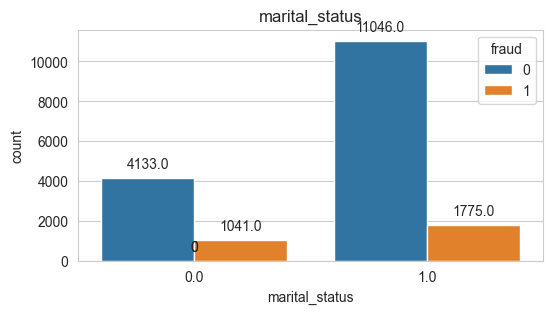

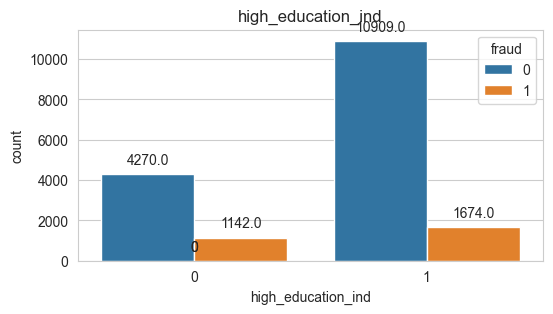

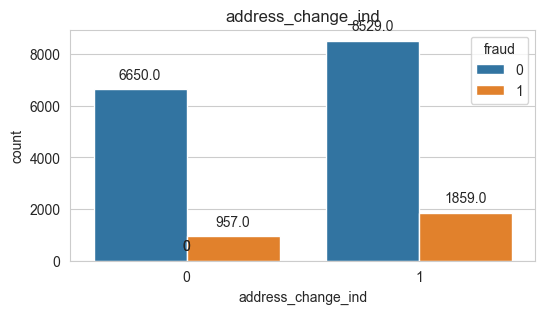

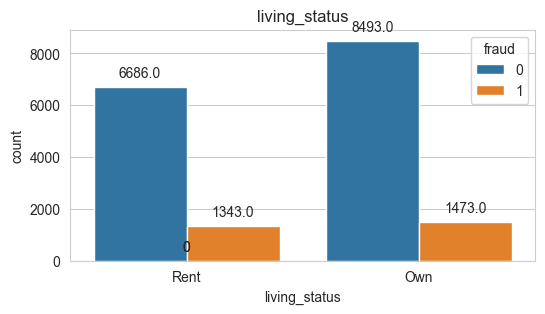

In [14]:
columns_of_interest = ["gender", "marital_status", "high_education_ind", "address_change_ind", "living_status"]

for col2 in columns_of_interest:
    sns.set_style('whitegrid')
    plt.figure(figsize=(6, 3))  # Adjust the figure size as needed
    
    # Create count plot
    ax = sns.countplot(x=col2, hue='fraud', data=df)
    
    # Add data labels to the bars
    for p in ax.patches:
        ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', xytext=(0, 10), textcoords='offset points')
    
    plt.title(f'{col2}')
    plt.show()

#### 7. Year vs Claims

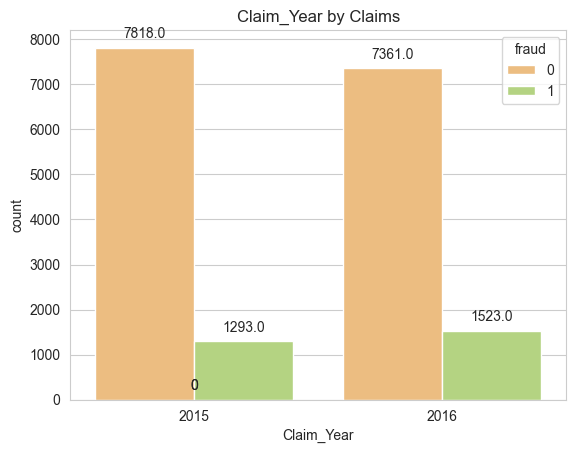

In [15]:
ax = sns.countplot(x='Claim_Year', hue='fraud', data=df, palette='RdYlGn')

# Add data labels to the bars
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Display the count plot
plt.title('Claim_Year by Claims')
plt.show()

In 2016, the fraud count seemed to be increased in count compared to 2015

#### 8. Accident site vs Claims

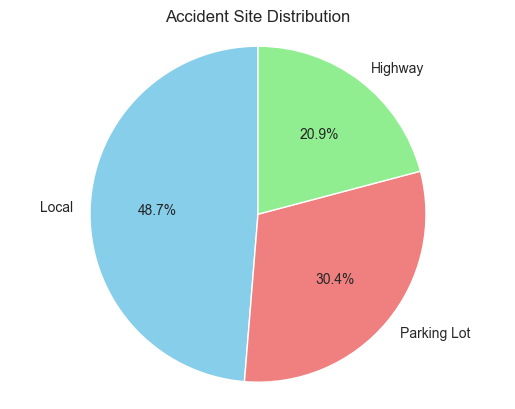

In [16]:
site_counts = df['accident_site'].value_counts()

# Create a pie chart
fig, ax = plt.subplots()
ax.pie(site_counts, labels=site_counts.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral', 'lightgreen'])

# Add data labels to the wedges
for i, (label, count) in enumerate(zip(site_counts.index, site_counts)):
    angle = sum(site_counts[:i]) + count / 2
    x = 0.5 * (1.2 * (angle > 180) - 1)
    y = 1.2 * angle % 180
    ax.annotate(f'{count}', (x, y), xytext=(1.35 * x, 1.35 * y), ha='center', va='center')

# Set aspect ratio to be equal, ensuring the pie chart is circular
ax.axis('equal')

# Display the pie chart
plt.title('Accident Site Distribution')
plt.show()

C:\Users\sidde\AppData\Local\Temp\ipykernel_14024\625789610.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='accident_site', data=fraud_data, palette=custom_palette)
C:\Users\sidde\AppData\Local\Temp\ipykernel_14024\625789610.py:7: UserWarning: 
The palette list has fewer values (2) than needed (3) and will cycle, which may produce an uninterpretable plot.
  ax = sns.countplot(x='accident_site', data=fraud_data, palette=custom_palette)


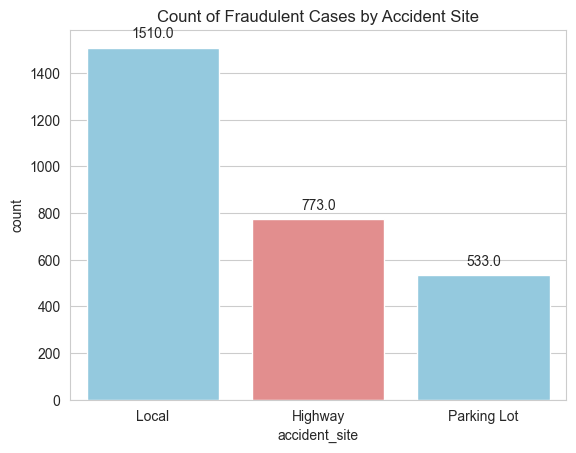

In [17]:

custom_palette = ['skyblue', 'lightcoral']

# Filter the DataFrame to include only rows where fraud is 1 (assuming fraud is binary)
fraud_data = df[df['fraud'] == 1]

# Create a count plot for 'accident_site' with the filtered fraud data and custom palette
ax = sns.countplot(x='accident_site', data=fraud_data, palette=custom_palette)

# Set a title for the plot
ax.set_title('Count of Fraudulent Cases by Accident Site')

# Add data labels on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Show the plot
plt.show()

Accident site LOCAL has the higesht number of claims and highest fraud reported

#### Fraudulent Cases by Channel

C:\Users\sidde\AppData\Local\Temp\ipykernel_14024\3026646513.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='channel', data=fraud_data, palette=custom_palette)
C:\Users\sidde\AppData\Local\Temp\ipykernel_14024\3026646513.py:12: UserWarning: 
The palette list has fewer values (2) than needed (3) and will cycle, which may produce an uninterpretable plot.
  ax = sns.countplot(x='channel', data=fraud_data, palette=custom_palette)


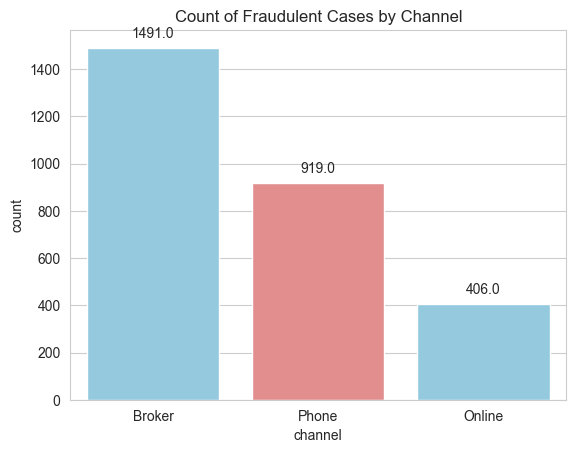

In [18]:
channel_colors = {
    'Online': 'skyblue',
    'Agent': 'lightcoral',
    'Branch': 'gold',
    # Add more colors for additional channels if needed
}

# Filter the DataFrame to include only rows where fraud is 1 (assuming fraud is binary)
fraud_data = df[df['fraud'] == 1]

# Create a count plot for 'accident_site' with the filtered fraud data and custom palette
ax = sns.countplot(x='channel', data=fraud_data, palette=custom_palette)

# Set a title for the plot
ax.set_title('Count of Fraudulent Cases by Channel')

# Add data labels on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Show the plot
plt.show()

#### 9. Claim Estimation Payout for Fraud and Non-Fraud Cases 


C:\Users\sidde\AppData\Local\Temp\ipykernel_14024\2579952437.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=medians.index, y=medians.values, palette='pastel')


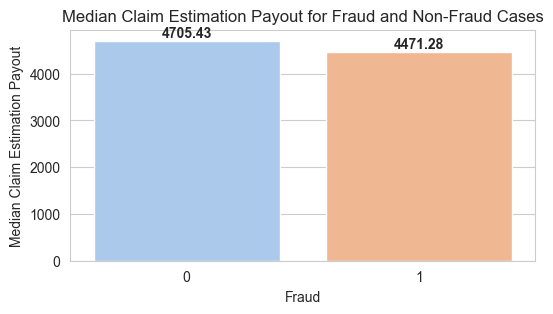

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Bar chart of median claim_est_payout for Fraud and Non-Fraud Cases
plt.figure(figsize=(6,3))
# Calculate median values for each category
medians = df.groupby('fraud')['claim_est_payout'].median()

# Create a bar plot
ax = sns.barplot(x=medians.index, y=medians.values, palette='pastel')

# Adding data labels
for i, median_value in enumerate(medians.values):
    ax.text(i, median_value, f'{median_value:.2f}', ha='center', va='bottom', fontdict={'weight': 'bold'})

# Set labels and title
ax.set_xlabel('Fraud')
ax.set_ylabel('Median Claim Estimation Payout')
ax.set_title('Median Claim Estimation Payout for Fraud and Non-Fraud Cases')

plt.show()


#### 10. Living status vs Claim Est Payout

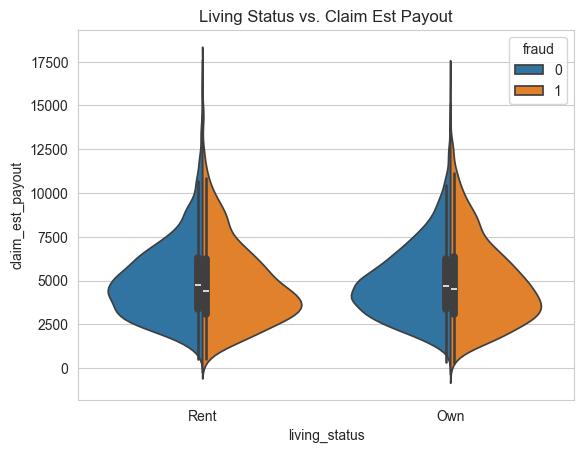

In [20]:
# Violin plot for 'living_status' and 'claim_est_payout'
sns.violinplot(x='living_status', y='claim_est_payout', hue='fraud', data=df, split=True)
plt.title('Living Status vs. Claim Est Payout')
plt.show()

#### 11. Annual Income vs. Claim Est Payout distribution

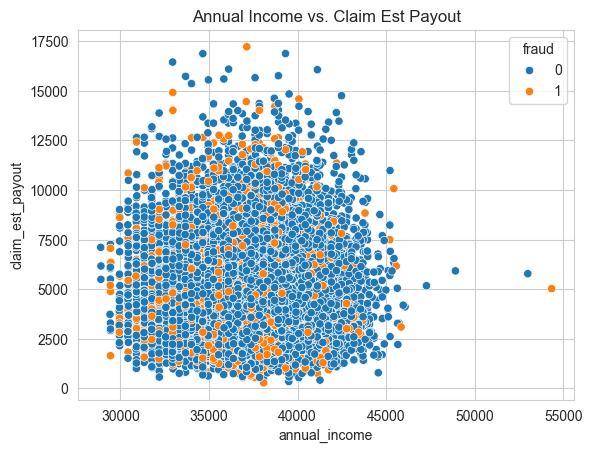

In [21]:

# Relationship between 'annual_income' and 'claim_est_payout'
sns.scatterplot(x='annual_income', y='claim_est_payout', hue='fraud', data=df)
plt.title('Annual Income vs. Claim Est Payout')
plt.show()



### Feature Engineering

In [22]:
#Zip code & claim_date is dropped as its not useful for classification
df = df.drop('claim_date', axis=1)
#Instead of claim_date, Claim_Year will be suitable.
df = df.drop('zip_code', axis=1)

df = df.drop('claim_number', axis=1)
#Claim Number is a unique column, hence removed.

#### Numerical Variables

In [23]:
numerical_features=[feature for feature in df.columns if df[feature].dtype!='O']

In [24]:
numerical_features

['age_of_driver',
 'marital_status',
 'safty_rating',
 'annual_income',
 'high_education_ind',
 'address_change_ind',
 'past_num_of_claims',
 'witness_present_ind',
 'liab_prct',
 'policy_report_filed_ind',
 'claim_est_payout',
 'age_of_vehicle',
 'vehicle_price',
 'vehicle_weight',
 'fraud',
 'Claim_Year']

In [25]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# Extract numerical columns (you might need to adapt this based on your DataFrame structure)
numerical_features = df.select_dtypes(include=['float64', 'int64']).columns

# Apply Min-Max scaling to the numerical columns
df[numerical_features] = scaler.fit_transform(df[numerical_features])

#### Categorical Variables

In [26]:
categorical_features=[feature for feature in df.columns if df[feature].dtype=='O']

for feature in categorical_features[:]:
    print(feature,":",len(df[feature].unique()),'labels')

gender : 2 labels
living_status : 2 labels
claim_day_of_week : 7 labels
accident_site : 3 labels
channel : 3 labels
vehicle_category : 3 labels
vehicle_color : 7 labels


The Vehicle_color has more than 3 labels. Hence,
Frequency encoding : vehicle_color , 
One hot encoding : gender,living_status,accident_site,channel,vehicle_category,
Ordinal Number Encoding : claim_day_of_week

###### Ordinal Number Encoding

In [27]:
dictionary={'Monday':1,'Tuesday':2,'Wednesday':3,'Thursday':4,'Friday':5,'Saturday':6,'Sunday':7}

#Encodes all the day names to assigned numbers
df['claim_day_of_week']=df['claim_day_of_week'].map(dictionary)


######  Frequency Encoding

In [28]:
Map = df['vehicle_color'].value_counts().to_dict()

#Mapping the respective value counts to the colors
df['vehicle_color']=df['vehicle_color'].map(Map)


######  One Hot Encoding

In [29]:
# Create dummy columns
accident_site_dummies = pd.get_dummies(df['accident_site'], drop_first=True)
channel_dummies = pd.get_dummies(df['channel'], drop_first=True)
vehicle_category_dummies = pd.get_dummies(df['vehicle_category'], drop_first=True)

# Concatenate the dummy columns with the original DataFrame
df = pd.concat([df, accident_site_dummies], axis=1)
df = pd.concat([df, channel_dummies], axis=1)
df = pd.concat([df, vehicle_category_dummies], axis=1)

# Drop the original 'accident_site' column
df = df.drop('accident_site', axis=1)
df = df.drop('channel', axis=1)
df = df.drop('vehicle_category', axis=1)

######  Binary Encoding

In [30]:
df['gender'] = df['gender'].map({'M': 1, 'F': 0})
df['living_status'] = df['living_status'].map({'Rent': 1, 'Own': 0})


#### Train Test Split

In [31]:
from sklearn.model_selection import train_test_split

# Assume 'df' is your DataFrame with features and target variable
# X should contain the features (independent variables), and y should contain the target variable (dependent variable)

# Assuming 'fraud' is the target variable, and the rest are features
X = df.drop('fraud', axis=1)
y = df['fraud']

# Split the data into training and testing sets
# Adjust the 'test_size' parameter as needed (e.g., test_size=0.3 for an 70/30 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Display the shapes of the resulting sets
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)



Training set shape: (12596, 25) (12596,)
Testing set shape: (5399, 25) (5399,)


### Data Modelling

In [32]:
#!pip install xgboost
# !pip install imbalanced-learn
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.pipeline import Pipeline


In [33]:
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

# Assuming X_train and y_train are your training data
ros = RandomOverSampler(sampling_strategy=0.75)
X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)

print("The number of classes before fit: {}".format(Counter(y_train)))
print("The number of classes after fit: {}".format(Counter(y_train_resampled)))

The number of classes before fit: Counter({0.0: 10591, 1.0: 2005})
The number of classes after fit: Counter({0.0: 10591, 1.0: 7943})


In [34]:
# Oversample
rf_pipeline = Pipeline([
     
    ('classifier', RandomForestClassifier(random_state=42))
])

# Fit the pipeline
rf_pipeline.fit(X_train_resampled, y_train_resampled)

# Predictions
y_pred = rf_pipeline.predict(X_test)

# Evaluate
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.8476

Classification Report:
              precision    recall  f1-score   support

         0.0       0.85      0.99      0.92      4588
         1.0       0.42      0.04      0.08       811

    accuracy                           0.85      5399
   macro avg       0.64      0.52      0.50      5399
weighted avg       0.79      0.85      0.79      5399


Confusion Matrix:
[[4542   46]
 [ 777   34]]


In [35]:
# Create a pipeline with imputation and XGBClassifier
xgb_pipeline = Pipeline([

    ('classifier', XGBClassifier(random_state=42))
])

# Fit the pipeline
xgb_pipeline.fit(X_train_resampled, y_train_resampled)

# Predictions
y_pred_xgb = xgb_pipeline.predict(X_test)

# Evaluate
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print(f"XGBoost Accuracy: {accuracy_xgb:.4f}")

print("\nXGBoost Classification Report:")
print(classification_report(y_test, y_pred_xgb))

print("\nXGBoost Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_xgb))

XGBoost Accuracy: 0.7926

XGBoost Classification Report:
              precision    recall  f1-score   support

         0.0       0.87      0.89      0.88      4588
         1.0       0.29      0.27      0.28       811

    accuracy                           0.79      5399
   macro avg       0.58      0.58      0.58      5399
weighted avg       0.79      0.79      0.79      5399


XGBoost Confusion Matrix:
[[4063  525]
 [ 595  216]]
